# Models To Predict Obesity Risk

To find the best model to predict obesity risk we will have 4 different approaches using different models. Here is is the list of models:

- Logistic Regression
- Random Forest
- XGBoost
- Neuronal Network

Every model will be trained with the processed data using GridSearch with a set of defined hyperparameters to test using a 5-fold cross validation strategy. Here is the step by step of that training and the metrics of each model in the training stage.

## Required Imports

In [1]:
import sys
sys.path.append('../../')

In [2]:
import os
import pickle
import pandas as pd
import numpy as np
import warnings

from src.models.build_models import build_models, build_lr, build_rf, build_xgboost
from src.metrics.models_metrics import print_sklearn_model_metrics

In [3]:
warnings.filterwarnings("ignore")

## Constants Defintion

In [4]:
DATA_PATH = '../../data/'
PROCESSED_PATH = DATA_PATH + 'processed/'
RESULTS_PATH = '../../results/'
MODELS_PATH = RESULTS_PATH + 'models/'

## Data Loading

In [5]:
train_df = pd.read_csv(PROCESSED_PATH + 'train.csv')

In [6]:
y = train_df.pop('NObeyesdad')
x = train_df

## Model Training

### Classical Models

In [7]:
logreg, rf, gb = build_models(x, y) 

Started Grid Search - Model: Logistic Regression Classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/ubilab/anaconda3/envs/obesity-risk/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ubilab/anaconda3/envs/obesity-risk/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ubilab/anaconda3/envs/obesity-risk/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ubilab/anaconda3/envs/obesity-risk/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ubilab/anaconda3/envs/obesity-risk/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Best parameters Logistic Regression Classifier: {'penalty': None, 'solver': 'lbfgs'}
Finished Grid Search - Model: Logistic Regression Classifier
Started Grid Search - Model: Random Forest Classifier
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters Random Forest Classifier: {'n_estimators': 200}
Finished Grid Search - Model: Random Forest
Started Grid Search - Model: Gradient Boosting Classifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 100, 'n_iter_no_change': 20}
Finished Grid Search - Model: Gradient Boosting Classifier


Now with the hyperparamters of the classical models we will instantiate those with the best HPs to avoid errors at future the save and load process from a pickle or .model file. The models will also be retrained.

In [10]:
logreg_hp = build_lr(x, y, None, 'lbfgs')
rf_hp = build_rf(x, y, 200)
xgboost_hp = build_xgboost(x, y, 0.1, 100)

[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .........penalty=l1, solver=newton-c;, score=nan total time=   0.0s
[CV 4/5] END .........penalty=l1, solver=newton-c;, score=nan total time=   0.0s
[CV 1/5] END ...........penalty=l2, solver=saga;, score=0.842 total time=   2.1s
[CV 3/5] END ...........penalty=l2, solver=saga;, score=0.847 total time=   2.2s
[CV 5/5] END .........penalty=None, solver=saga;, score=0.856 total time=   2.5s
[CV 3/5] END ...................n_estimators=20;, score=0.892 total time=   0.5s
[CV 1/5] END ...................n_estimators=60;, score=0.890 total time=   1.5s
[CV 3/5] END ...................n_estimators=80;, score=0.895 total time=   1.9s
[CV 5/5] END ..................n_estimators=100;, score=0.892 total time=   2.4s
[CV 2/5] END ...............

## Metrics

Accuracy: 0.8554774063011851
0.8305153136248068
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2523
           1       0.85      0.81      0.83      3082
           2       0.71      0.70      0.71      2427
           3       0.69      0.72      0.71      2522
           4       0.83      0.80      0.82      2910
           5       0.93      0.95      0.94      3248
           6       0.98      0.99      0.99      4046

    accuracy                           0.86     20758
   macro avg       0.84      0.84      0.84     20758
weighted avg       0.86      0.86      0.86     20758

AUC-ROC: 0.9777056699511917


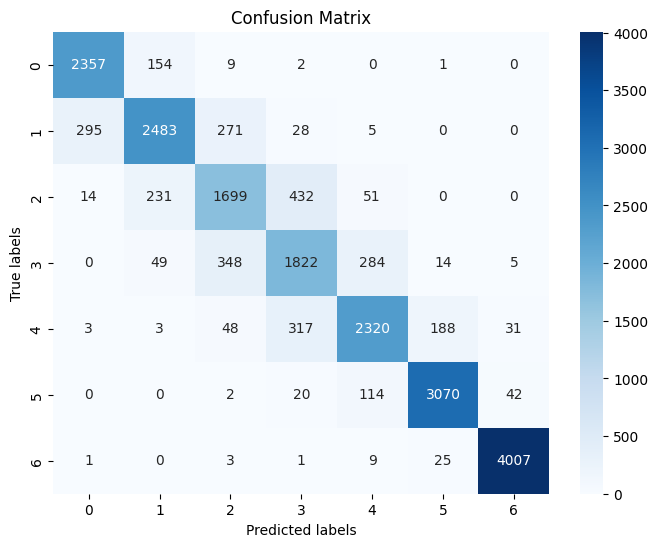

In [8]:
print_sklearn_model_metrics(logreg_hp, x, y)

Accuracy: 0.9994219096252047
0.9993219890305481
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2523
           1       1.00      1.00      1.00      3082
           2       1.00      1.00      1.00      2427
           3       1.00      1.00      1.00      2522
           4       1.00      1.00      1.00      2910
           5       1.00      1.00      1.00      3248
           6       1.00      1.00      1.00      4046

    accuracy                           1.00     20758
   macro avg       1.00      1.00      1.00     20758
weighted avg       1.00      1.00      1.00     20758

AUC-ROC: 0.999998811669798


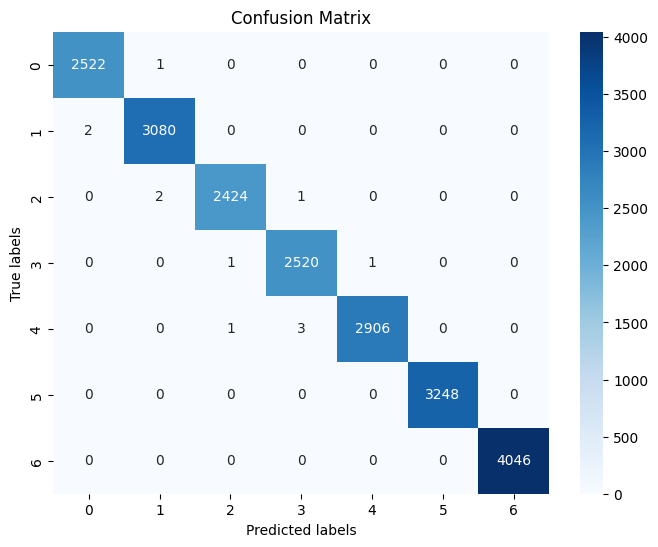

In [10]:
print_sklearn_model_metrics(rf_hp, x, y)

Accuracy: 0.9161287214567877
0.9016253166841018
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2523
           1       0.89      0.90      0.89      3082
           2       0.83      0.79      0.81      2427
           3       0.82      0.84      0.83      2522
           4       0.90      0.89      0.90      2910
           5       0.97      0.98      0.98      3248
           6       1.00      1.00      1.00      4046

    accuracy                           0.92     20758
   macro avg       0.91      0.91      0.91     20758
weighted avg       0.92      0.92      0.92     20758

AUC-ROC: 0.9919492112378292


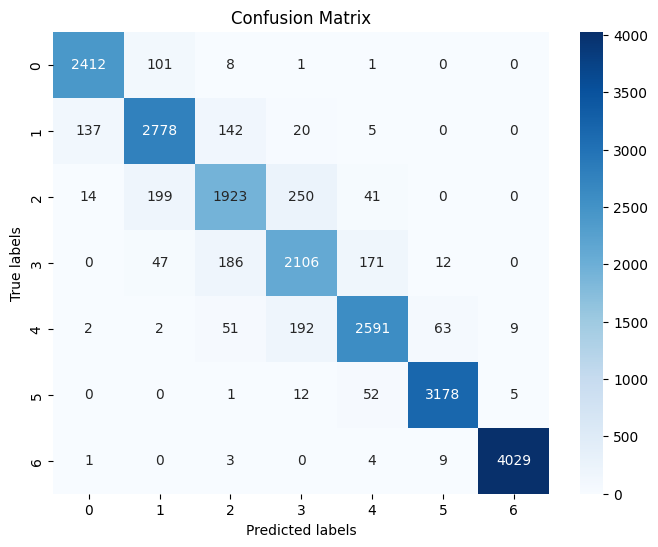

In [12]:
print_sklearn_model_metrics(xgboost_hp, x, y)

## Save Models

In [13]:
os.makedirs(MODELS_PATH, exist_ok=True)

with open(MODELS_PATH + 'model.logreg.pkl', 'wb') as file:
    pickle.dump(logreg_hp, file)
    file.close()
    
with open(MODELS_PATH + 'model.rf.pkl', 'wb') as file:
    pickle.dump(rf_hp, file)
    file.close()
    
with open(MODELS_PATH + 'model.xgboost.pkl', 'wb') as file:
    pickle.dump(xgboost_hp, file)
    file.close()